In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import os
from os import listdir
from os.path import isfile, isdir, join
from numpy import linalg
from numpy import matrix
import matplotlib.pyplot as plt

In [2]:
#data_path = 'C:/Users/IsuzuPredator/Desktop/Tinayu_GUIDesign/Tianyu/preocessed_data/'
data_path = './processed_data/'
abnormal_data_path = data_path+'abnormal_data/' # 10 days prediction
abnormal_data_path_1 = data_path+'abnormal_data_1/' # day by day prediction
abnormal_data_path_20 = data_path + 'abnormal_data_20/' # 20 days prediction
normal_data_path = data_path+'normal_data/' # normal data (small)

In [3]:
# define correct and problem index and construct sensor dictionary
raw_correct_idx = [1,2,3,4,5,6,7,8,9,20,23,31,33,34,39,40,41,43,44,45,55,60,69,70,71,72,73,74,75,76,79,80,81,82,83] # depends
raw_problem_idx = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21,22,24,25,26,27,28,29,30,32,35,36,37,38,42,46,47,48,49,50,51,52,53,54,61,62,63,68,77,78]
correct_idx = []
problem_idx = []
for idx in raw_correct_idx:
    correct_idx.append(idx - 1)
#len(correct_idx) -->35
#len(problem_idx) -->40

for idx in raw_problem_idx:
    problem_idx.append(idx - 1)
sensor_dict = {}
sensor_list = ['1.[Accelerator pedal opening degree](%)', '2.[Actual Engine Torque](%)', '3.[Engine Speed](rpm)', '4.[Target fuel injection amount](mm3/st)', '5.[Current Gear]', '6.[Vehicle speed (25 pulses)](km/h)', '7.[CluchSW](MT only)', '8.[Brake SW]', '9.[Cruise Control Status]', '10.[coolant temperature](℃)', '11.[fuel temperature](℃)', '12.[Post injection Q](mm3)', '13.[Common rail pressure](MPa)', '14.[DPF differential pressure](kPa)', '15.[Atmospheric pressure](kPa)', '16.[Intake air temperature](℃)', '17.[Boost pressure](kPa)', '18.[CSF inlet temperature](℃)', '19.[DOC inlet temperature](℃)', '20.[DPF Status]', '21.[DPF error count]', '22.[DPF warning count]', '23.[DPF PM accumulation status]', '24.[DPF mileage status]', '25.[ITH Motor Protect Duty Limit Status]', '26.[EGR Motor Protect Duty Limit Status]', '27.[EGR Motor2 Protect Duty Limit Status]', '28.[DPF mode]', '29.[MAF](g/cyl)', '30.[EGR Duty](%)', '31.[EGR Target Position](%)','32.[EGR Actual Position](%)', '33.[Intake Throttle Duty](%)', '34.[Intake Throttle Target Position](%)', '35.[Intake Throttle Actual Position](%)', '36.[IGN Voltage](V)', '37.[RPCV Duty(medium small)・PCV Close Timing(large)](%・CA)', '38.[RPCV Actual Current(medium small)・PCV F/B Control Quantity(large)](mA・CA)', '39.[RPCV Desired Current(medium small)・EGR BLDC 2 Actual Position(large)](mA・%)', '40.[RPCV Commanded Fuel Flow(medium small)・EGR BLDC 2 Duty](mm3/sec・%)', '41.[Target Rail Pressure](Mpa)', '42.[VNT actual Position](%)', '43.[VNT Target Position](%)', '44.[Target Boost](%)', '45.[Engine Mode]', '46.[Mail SOI](CA)', '47.[Pilot SOI](CA)', '48.[CAM CRANK Synchro Status]', '49.[Cylinder1 Balancing Fuel Compensation](mm3/st)', '50.[Cylinder2 Balancing Fuel Compensation](mm3/st)', '51.[Cylinder3 Balancing Fuel Compensation](mm3/st)', '52.[Cylinder4 Balancing Fuel Compensation](mm3/st)', '53.[Cylinder5 Balancing Fuel Compensation](mm3/st)', '54.[Cylinder6 Balancing Fuel Compensation](mm3/st)', '55.[Target Idle rpm](rpm)', '56.[VGS Magnetic Valve Drive Status 1]', '57.[VGS Magnetic Valve Drive Status 2]', '58.[VGS Magnetic Valve Drive Status 3]', '59.[EGR cooler bypas valve]', '60.[Exhaust pipe INJ ON / OFF state](%)', '61.[Injection amount of exhaust pipe INJ](mm3/st)', '62.[Exhaust pipe INJ fuel pressure](kPa)', '63.[Compressor outlet temperature](℃)', '64.[Rail pressure reducing valve drive duty](%)', '65.[Rail pressure reducing valve target current](mA)', '66.[Rail pressure reducing valve actual current](mA)', '67.[Rail pressure reducing valve target pressure](MPa)', '68.[Turbo EVRV Duty output](%)', '69.[egr_bldc_pid_base_dc_1]', '70.[egr_bldc_pid_base_dc_2]', '71.[egr_bldc_p_term_fnl_1]', '72.[egr_bldc_p_term_fnl_2]', '73.[egr_bldc_i_term_fnl_1]', '74.[egr_bldc_i_term_fnl_2]', '75.[rpcv_dc_p_gain]', '76.[rpcv_dc_i_gain]', '77.[trb_trg_base_pos]', '78.[trb_map_fb_pos]', '79.[trb_map_p_term_fnl]', '80.[trb_map_i_term_fnl]', '81.[ith_dc_p_term]', '82.[ith_dc_i_term]', '83.[ith_dc_ff_fb]', '84.[CAC in sensor output]', '85.[CAC out sensor output]', '86.[Rail pressure sensor 2 output](MPa)', '87.[Sensor value O2](%)','88.[TBD]']

for item in sensor_list:
    sensor_number = int(item.split('.')[0])
    sensor_name = item.split('.')[1]
    sensor_dict[sensor_number] = sensor_name

In [4]:
def read_training_pickle(directory):
    '''
    description: stack training multiple pickle in a directory with sub directory
    input: directory path and error list
    output: a single pkl file
    '''
    error_list = []
    temp = directory.split('/')[-2]
    if isfile("./"+temp+".pkl"):
        print("File already exist, loading from", "./"+temp+".pkl")
        pkl = pd.read_pickle("./"+temp+".pkl")
        print("Loading done")
    else:
        print("Loading pickle files from", directory)
        pkl = pd.DataFrame() # create an empty df
        for subdir in os.listdir(directory):
            dir_path = directory+subdir
            print("----------------"+subdir+"----------------") # display
            for file in os.listdir(dir_path):
                print(file)
                file_path = dir_path+"/"+file
                new_file = pd.DataFrame(pd.read_pickle(file_path))[problem_idx]
                pkl = pd.concat((pkl, new_file),axis=0) # concat
        pkl.to_pickle("./"+temp+".pkl") # save
        print("Pickle file save in", "./"+"_label"+".pkl")
    return pkl

In [5]:
normal_pkl = read_training_pickle(normal_data_path)

File already exist, loading from ./normal_data.pkl
Loading done


In [6]:
normal_pkl.shape

(442522, 88)

In [7]:
def read_test_case(directory):
    """
    Description: read 10 test cases into a dictionary
    Input:directory path
    Output:list
    """
    pkl_list = []
    for sub_dir in os.listdir(directory):
        print(sub_dir)
        sub_path = directory+sub_dir
        temp = []
        for pkl_file in os.listdir(sub_path):
            pkl_file_path = sub_path + '/' + pkl_file
            temp.append(pkl_file_path)
        pkl_list.append(temp)
    return pkl_list

In [8]:
normal_test_case = read_test_case(normal_data_path)

3002LV234N3-----7000607output
3002LV234N3-----7000617output
3002LV234N3-----7000619output


In [9]:
abnormal_test_case = read_test_case(abnormal_data_path)

3002LV234N3-----7000442output
3002LV234N3-----7000607output
3002LV234N3-----7000612output
3002LV234N3-----7000614output
3002LV234N3-----7000616output
3002LV234N3-----7000617output
3002LV234N3-----7000618output
3002LV234N3-----7000620output
3002LV234N3-----7000714output
3002LV234N3-----7000722output


In [10]:
def projection_matrix(matrix):
    """
    Description: compute the projection matrix of given data matrix
    Input: data matrix
    Output: projection matrix
    """
    #print(data_matrix)
    print("Rank of the matrix is", linalg.matrix_rank(matrix))
    u,s,vt = linalg.svd(matrix, full_matrices=False)
    ur = u[:,:10] # can modify by view singular values
    plt.plot(s)
    plt.title('Singular values')
    return np.matmul(ur,ur.transpose()), s

In [11]:
def pkl_to_matrix(pkl_file_path, train=1):
    """
    Description: convert pickle file to matrix, (add 1 at the head and tail)
    Input: pkl_file_path
    Output: matrix(row: 40 sensors | column : # of samples)
    """
    # load traning data from stacked pickle 
    if train == 1:
        temp = pkl_file_path.split('/')[-2]
        print(temp)
        if isfile("./"+temp+".pkl"): # normal_data
            matrix = np.load("./"+temp+".pkl")[problem_idx]
            #allOne = np.ones((1,matrix.shape[1])) # construct a all one sample
            #matrix = np.concatenate((allOne, matrix), axis=0)
            #matrix = np.concatenate((matrix, allOne), axis=0)
            print("Convert", temp, "to matrix... Done")
        else:
            print("Error: normal_data.pkl doesn't exist. Call function {read_training_pickle} first.")
    
    # load test data, note only use labels
    else:
        if isfile(pkl_file_path):
            matrix = pd.DataFrame(pd.read_pickle(pkl_file_path))
            if matrix.shape[1] == 89:
                #print(pkl_file_path)
                matrix = matrix[list(range(88))]
            matrix = matrix[problem_idx]
            #allOne = np.ones((1,matrix.shape[1])) # construct a all one sample
            #matrix = np.concatenate((allOne, matrix), axis=0)
            #matrix = np.concatenate((matrix, allOne), axis=0)
            #print("Convert", pkl_file_path, "to matrix... Done")
        else:
            print("Error: file doesn't exist")
    return matrix.transpose()

normal_data
Convert normal_data to matrix... Done
Rank of the matrix is 35


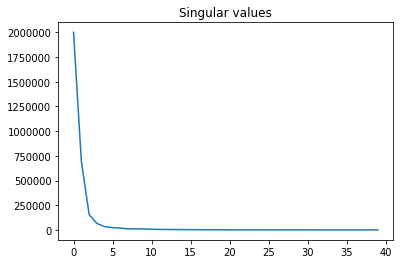

In [12]:
train_matrix = pkl_to_matrix(normal_data_path)
p, s = projection_matrix(train_matrix)

In [38]:
def projection_distance(matrix, projection):
    """
    Description: calculate the distance between a vector and a subspace(described as projeciton matrix)
    Input: vector: test samples
    Output: Euclidean distance
    """
    num = projection.shape[0]
    matrix_hat = np.matmul(projection, matrix)
    distance = 0
    matrix_difference = matrix_hat - matrix
    for i in range(matrix_difference.shape[1]): # sample vecor index
        temp = linalg.norm(matrix_difference[i])
        #print(matrix_difference[i])
        #print(temp)
        distance+=temp
    return distance/num

In [39]:
projection_distance(test_matrix, p)

2990.971549490808

In [40]:
# calculate distance for 10 cases and plot the result for each case
if not isdir("./res_test_projection"):
    os.mkdir("./res_test_projection")

distance_test = []
for case in abnormal_test_case:

    temp = []
    fig_name = case[0].split('/')[-2][-9:-6]
    fig_name = './res_test_projection/' + fig_name
    date_list = []
    year = case[0].split('/')[-1].split('_')[0][-4:]
    month = case[0].split('/')[-1].split('_')[1]
    
    for file in case:
        if os.path.isfile(file):
            test_matrix = pkl_to_matrix(file, train=0)
            temp.append(projection_distance(test_matrix,p))
            date = file.split('/')[-1].split('_')[2].split('.')[0]
            date_list.append(date)
    
    # statistics calculation
    mean = np.mean(temp)
    variance = np.var(temp)


    # display and save figure
    print("-----------------------------")
    print("Plotting abnormal case start from", year+'/'+month)
    print("Dates", date_list)
    print("Mean: ",mean, "Variance: ", variance)
    print("Figure saved in", fig_name)

    plt.plot(temp)
    plt.xlabel('date')
    plt.ylabel('distance')
    plt.xticks(range(len(date_list)), date_list) # change when do 20 days prediction
    plt.title('Euclidean distance of case '+fig_name.split('/')[-1])
    plt.legend([year+'/'+month])
    #plt.text(0.2, 0.95, "mean"+str(mean), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.savefig(fig_name)
    plt.close()
    distance_test.append(temp)

-----------------------------
Plotting abnormal case start from 2016/11
Dates ['25', '26', '27', '28', '29', '30', '1', '2', '3', '5']
Mean:  3107.126975661921 Variance:  2122617.4535941235
Figure saved in ./res_test_projection/442
-----------------------------
Plotting abnormal case start from 2015/4
Dates ['10', '11', '12', '13', '14', '15', '16', '17', '8', '9']
Mean:  3732.0707338866296 Variance:  1601091.1724855837
Figure saved in ./res_test_projection/607
-----------------------------
Plotting abnormal case start from 2015/12
Dates ['11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21']
Mean:  2866.6052851681557 Variance:  1316352.5239520748
Figure saved in ./res_test_projection/612
-----------------------------
Plotting abnormal case start from 2016/3
Dates ['20', '21', '22', '23', '24', '25', '26', '27', '28', '29']
Mean:  3468.155929963005 Variance:  860145.5565704221
Figure saved in ./res_test_projection/614
-----------------------------
Plotting abnormal case star

In [41]:
# plot distance case by case

# for i in range(len(distance)): # 10 abnormal cases
#     plt.plot(distance[i])
#     plt.xlabel('days')
#     plt.xticks(np.arange(1,11)) # change when do 20 days prediction
#     plt.ylabel('distance')
#     plt.savefig('./res_projection/distance_case'+str(i))
#     plt.close()

In [42]:
# plot for training
# calculate distance for 10 cases and plot the result for each case
if not isdir("./res_normal_projection"):
    os.mkdir("./res_normal_projection")

distance_train = []
for case in normal_test_case:

    temp = []
    fig_name = case[0].split('/')[-2][-9:-6]
    fig_name = './res_normal_projection/' + fig_name
    date_list = []
    year = case[0].split('/')[-1].split('_')[0][-4:]
    month = case[0].split('/')[-1].split('_')[1]
    
    for file in case:
        if os.path.isfile(file):
            test_matrix = pkl_to_matrix(file, train=0)
            temp.append(projection_distance(test_matrix,p))
            date = file.split('/')[-1].split('_')[2].split('.')[0]
            date_list.append(date)
    
    # statistics calculation
    mean = np.mean(temp)
    variance = np.var(temp)


    # display and save figure
    print("-----------------------------")
    print("Plotting abnormal case start from", year+'/'+month)
    print("Dates", date_list)
    print("Mean: ",mean, "Variance: ", variance)
    print("Figure saved in", fig_name)

    plt.plot(temp)
    plt.xlabel('date')
    plt.ylabel('distance')
    plt.xticks(range(len(date_list)), date_list) # change when do 20 days prediction
    plt.title('Euclidean distance of case '+fig_name.split('/')[-1])
    plt.legend([year+'/'+month])
    #plt.text(0.2, 0.95, "mean"+str(mean), horizontalalignment='center',verticalalignment='center', transform=ax.transAxes)
    plt.savefig(fig_name)
    plt.close()
    distance_train.append(temp)

-----------------------------
Plotting abnormal case start from 2017/4
Dates ['23', '24', '25', '26', '27', '28', '29', '30', '1']
Mean:  3189.829134436876 Variance:  41180.950734543825
Figure saved in ./res_normal_projection/607
-----------------------------
Plotting abnormal case start from 2016/12
Dates ['27', '28', '29', '30', '31', '1', '10', '11', '12', '13', '14', '15', '2', '3', '4', '5', '6', '7', '8', '9']
Mean:  3300.149914065053 Variance:  612168.6131379695
Figure saved in ./res_normal_projection/617
-----------------------------
Plotting abnormal case start from 2016/11
Dates ['11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']
Mean:  3202.7665998252055 Variance:  678418.7493817257
Figure saved in ./res_normal_projection/619
